In [29]:
# import statements
import os
%matplotlib inline
import numpy as np
import pylab as pl
pl.rcParams['image.origin'] = 'lower' # make images display right-side-up
pl.style.use('dark_background')
import glob
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.image as img
import math
from matplotlib import transforms
import scipy.ndimage as snd
from scipy import ndimage, misc
import skimage
import skimage.transform

# Note that there was a dead pixel at (630, 309) on our CCD, both observing times
# Therefore any line thats like var[308][628] = var[309][629] is me accounting for the
# pixel that is currently ruining my life by setting it equal to just a random pixel nearby


## Lab 7

In [30]:
# Biases
os.chdir('C:\\Users\\Pae\\Documents\\Pictures.2\\school\\school but less important files\\programming\\projects\\obs\\lab7\\data')
    # I know I have an inefficient way of keeping files

biases = glob.glob('**/bias_0s_*.FIT')
biases

['bias\\bias_0s_001.FIT',
 'bias\\bias_0s_002.FIT',
 'bias\\bias_0s_003.FIT',
 'bias\\bias_0s_004.FIT',
 'bias\\bias_0s_005.FIT',
 'bias\\bias_0s_006.FIT',
 'bias\\bias_0s_007.FIT',
 'bias\\bias_0s_008.FIT',
 'bias\\bias_0s_009.FIT',
 'bias\\bias_0s_010.FIT']

In [31]:
bias_timestream = [fits.getdata(x)*fits.getheader(x)['EGAIN'] for x in biases]
mean_bias = np.mean(bias_timestream, axis=0)
median_bias = np.median(bias_timestream, axis=0)
mean_bias[308][628] = mean_bias[309][629]

stddev_bias = np.std(bias_timestream, axis=0)
stddev_bias[308][628] = stddev_bias[309][629]

readnoise = np.mean(stddev_bias)

del bias_timestream

In [32]:
mean_bias_noise = readnoise / np.sqrt(len(biases))
mean_bias_noise

4.923827366324085

In [33]:
# Darks
    # darks for .04s, .1s, .5s, 1s, 3s, 45s, 50s

darks_40ms = glob.glob("**/dark_0d4*.FIT")
darks_100ms = glob.glob("**/dark_0d1s_*.FIT")
darks_500ms = glob.glob("**/dark_0d5s_*.FIT")
darks_1s = glob.glob("**/dark_10*.FIT")
darks_3s = glob.glob("**/dark_3s_*.FIT")
darks_45s = glob.glob("**/dark_45*.FIT")
darks_50s = glob.glob("**/dark_50s_*FIT")

darks_40ms

['darks\\dark_0d4001.FIT',
 'darks\\dark_0d4002.FIT',
 'darks\\dark_0d4003.FIT',
 'darks\\dark_0d4004.FIT',
 'darks\\dark_0d4005.FIT',
 'darks\\dark_0d4006.FIT',
 'darks\\dark_0d4007.FIT',
 'darks\\dark_0d4008.FIT',
 'darks\\dark_0d4009.FIT',
 'darks\\dark_0d4010.FIT',
 'darks\\dark_0d4_.FIT']

In [34]:
os.chdir('C:\\Users\\Pae\\Documents\\Pictures.2\\school\\school but less important files\\programming\\projects\\obs\\lab7\\data')

darks_40ms = [fits.getdata(x)*fits.getheader(x)['EGAIN'] for x in darks_40ms]
average_40ms_dark = np.mean(darks_40ms, axis=0)
median_40ms_dark = np.median(darks_40ms, axis=0)
average_40ms_dark[308][628] = average_40ms_dark[309][629]
stddev_40ms_dark = np.std(darks_40ms, axis=0)

darks_100ms = [fits.getdata(x)*fits.getheader(x)['EGAIN'] for x in darks_100ms]
average_100ms_dark = np.mean(darks_100ms, axis=0)
average_100ms_dark[308][628] = average_100ms_dark[309][629]
stddev_100ms_dark = np.std(darks_100ms, axis=0)

darks_500ms = [fits.getdata(x)*fits.getheader(x)['EGAIN'] for x in darks_500ms]
average_500ms_dark = np.mean(darks_500ms, axis=0)
average_500ms_dark[308][628] = average_500ms_dark[309][629]
stddev_500ms_dark = np.std(darks_500ms, axis=0)

darks_1s = [fits.getdata(x)*fits.getheader(x)['EGAIN'] for x in darks_1s]
average_1s_dark = np.mean(darks_1s, axis=0)
average_1s_dark[308][628] = average_1s_dark[309][629]
stddev_1s_dark = np.std(darks_1s, axis=0)

darks_3s = [fits.getdata(x)*fits.getheader(x)['EGAIN'] for x in darks_3s]
average_3s_dark = np.mean(darks_3s, axis=0)
average_3s_dark[308][628] = average_3s_dark[309][629]
stddev_3s_dark = np.std(darks_3s, axis=0)

darks_45s = [fits.getdata(x)*fits.getheader(x)['EGAIN'] for x in darks_45s]
average_45s_dark = np.mean(darks_45s, axis=0)
median_45s_dark = np.median(darks_45s, axis=0)
average_45s_dark[308][628] = average_45s_dark[309][629]
median_45s_dark[308][628] = median_45s_dark[309][629]
stddev_45s_dark = np.std(darks_45s, axis=0)

darks_50s = [fits.getdata(x)*fits.getheader(x)['EGAIN'] for x in darks_50s]
average_50s_dark = np.mean(darks_50s, axis=0)
average_50s_dark[308][628] = average_50s_dark[309][629]
stddev_50s_dark = np.std(darks_50s, axis=0)

In [35]:
uncertainty_on_40ms_mean_dark = stddev_40ms_dark / np.sqrt(len(darks_40ms))
uncertainty_on_100ms_mean_dark = stddev_100ms_dark / np.sqrt(len(darks_100ms))
uncertainty_on_500ms_mean_dark = stddev_500ms_dark / np.sqrt(len(darks_500ms))
uncertainty_on_1s_mean_dark = stddev_1s_dark / np.sqrt(len(darks_1s))
uncertainty_on_3s_mean_dark = stddev_3s_dark / np.sqrt(len(darks_3s))
uncertainty_on_45s_mean_dark = stddev_45s_dark / np.sqrt(len(darks_45s))
uncertainty_on_50s_mean_dark = stddev_50s_dark / np.sqrt(len(darks_50s))

del darks_40ms
del darks_100ms
del darks_500ms
del darks_1s
del darks_3s
del darks_45s
del darks_50s

# TEST BEGIN

In [36]:
os.chdir('C:\\Users\\Pae\\Documents\\Pictures.2\\school\\school but less important files\\programming\\projects\\obs\\lab7\\data\\m42')

B_flat_m42 = glob.glob("**/flat_b_1s*.FIT")
I_flat_m42 = glob.glob("**/flat_i_1s*.FIT")
V_flat_m42 = glob.glob("**/flat_v_1s*.FIT")

B_quad1_m42 = glob.glob("**/m42_45s_q1_b_*.FIT")
B_quad2_m42 = glob.glob("**/m42_45s_q2_b_*.FIT")
B_quad3_m42 = glob.glob("**/m42_45s_q3_b_*.FIT")
B_quad4_m42 = glob.glob("**/m42_45s_q4_b_*.FIT")

I_quad1_m42 = glob.glob("**/m42_45s_q1_i_*.FIT")
I_quad2_m42 = glob.glob("**/m42_45s_q2_i_*.FIT")
I_quad3_m42 = glob.glob("**/m42_45s_q3_i_*.FIT")
I_quad4_m42 = glob.glob("**/m42_45s_q4_i_*.FIT")

V_quad1_m42 = glob.glob("**/m42_45s_q1_v_*.FIT")
V_quad2_m42 = glob.glob("**/m42_45s_q2_v_**.FIT")
V_quad3_m42 = glob.glob("**/m42_45s_q3_v_*.FIT")
V_quad4_m42 = glob.glob("**/m42_45s_q4_v_*.FIT")

In [37]:
# B filter shit
B_flat_m42_timestream = [fits.getdata(x)*fits.getheader(x)['EGAIN'] for x in B_flat_m42]
mean_B_flat_m42 = np.mean(B_flat_m42_timestream, axis=0)
del B_flat_m42_timestream

mean_B_flat_m42[308][628] = mean_B_flat_m42[309][629]

bias_subtracted_B_flat_m42 = mean_B_flat_m42 - mean_bias
bias_subtracted_B_flat_m42_median = mean_B_flat_m42 - median_bias
ave_flat_B_biassub_norm = bias_subtracted_B_flat_m42_median / np.mean(bias_subtracted_B_flat_m42_median)
B_gain = fits.getheader('flat\\flat_b_1s001.FIT')['EGAIN']
flat_poisson_uncertainty_m42 = (bias_subtracted_B_flat_m42)**0.5
flat_singleframe_uncertainty_m42 = (flat_poisson_uncertainty_m42**2 + readnoise**2)**0.5
flat_total_uncertainty_m42_B = ((flat_singleframe_uncertainty_m42/np.sqrt(len(B_flat_m42)))**2 + mean_bias_noise**2)**0.5
mean_of_flat_m42 = np.mean(bias_subtracted_B_flat_m42)
normalized_mean_B_flat_m42 = bias_subtracted_B_flat_m42 / mean_of_flat_m42
np.mean(normalized_mean_B_flat_m42)

0.9999999999999999

In [38]:
# Testing on B filter of quadrant 3
B_timestream = [fits.getdata(x)*fits.getheader(x)['EGAIN'] for x in B_quad3_m42]
image1 = B_timestream[0]
image1[308][628] = image1[309][629]
image2 = B_timestream[1]
image2[308][628] = image2[309][629]
image3 = B_timestream[2]
image3[308][628] = image3[309][629]

x_1, y_1 = 118, 295
x_2, y_2 = 80, 259
x_3, y_3 = 36, 256

# Differences
# Diff of star 1 between first and second images
x_12 = x_1 - x_2
y_12 = y_1 - y_2

# Diff of star 1 between first and third images
x_13 = x_1 - x_3
y_13 = y_1 - y_3

In [39]:
darksub_B_timestream = [im - median_45s_dark for im in B_timestream]
processed_median_combined_images = np.median(darksub_B_timestream, axis=0)

In [40]:
im0 = np.roll(np.roll(darksub_B_timestream[2], y_13, axis=0), x_13, axis=1)
im1 = darksub_B_timestream[0] # this is our "reference image", it stays put

# the bottom-left image, im2, only needs to "roll" on the Y-axis
im2 = np.roll(np.roll(darksub_B_timestream[1], y_12, axis=0), x_12, axis=1)
rolled_images = [im0,im1,im2]
rolled_median = np.median(rolled_images, axis=0)

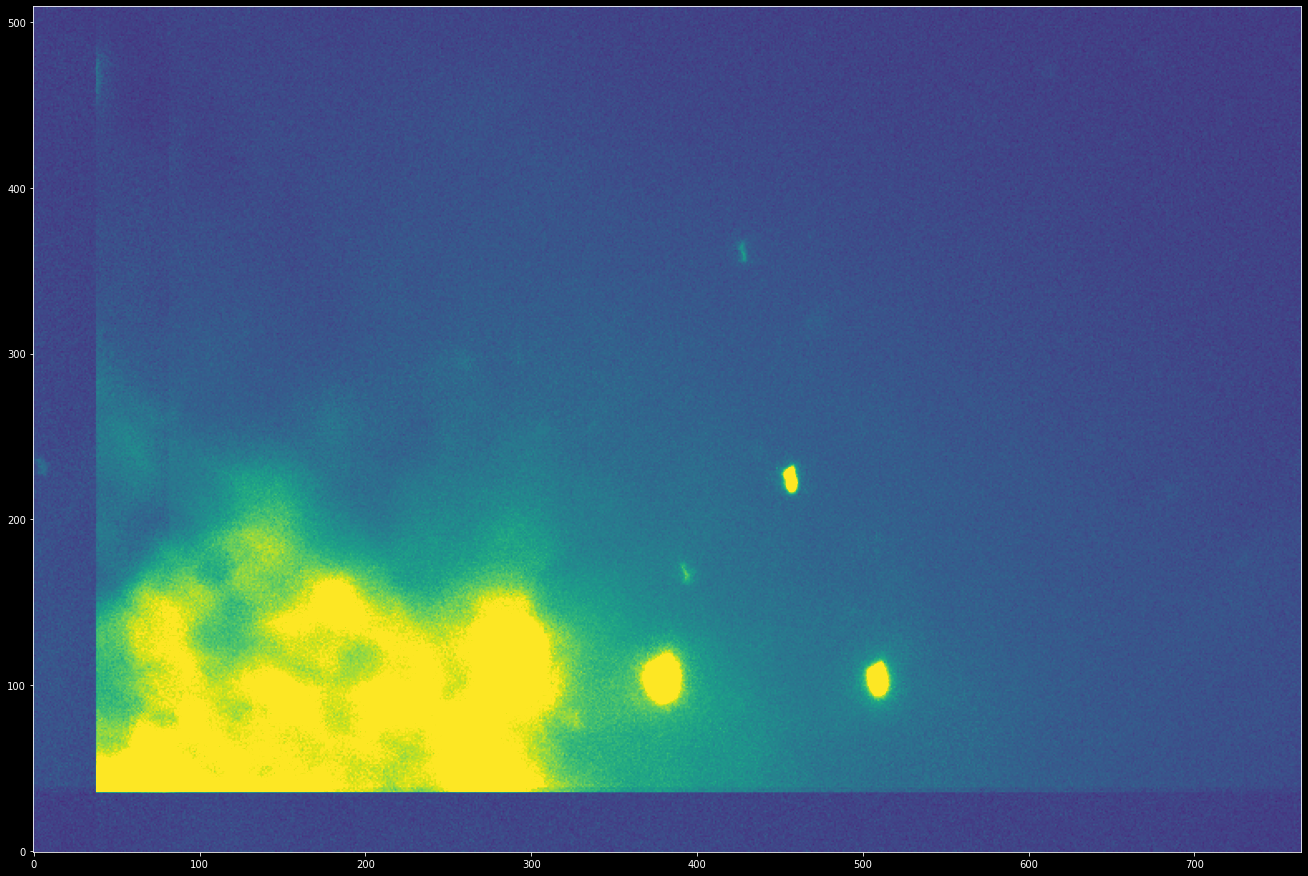

In [41]:
pl.figure(figsize=(50,50))
ax = pl.subplot(1,2,2)
ax.imshow(rolled_median, origin='lower', vmax=750, vmin=0)